In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
wine_data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

trian_input, test_input, train_target, test_target = train_test_split(
    wine_data, wine_target, test_size=0.2, random_state=42
)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(trian_input, train_target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
print(dt.score(trian_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8584615384615385


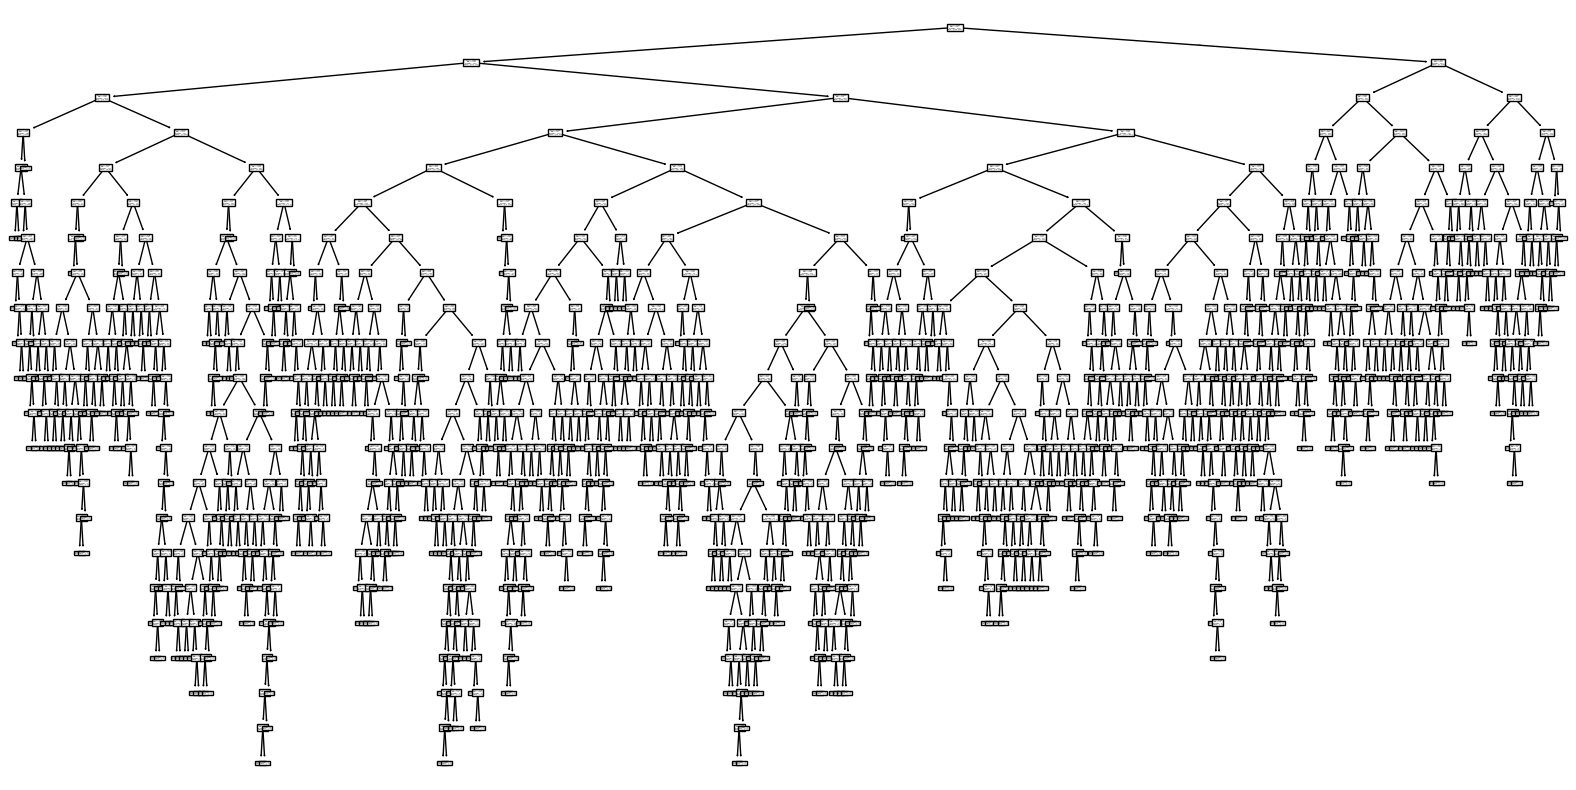

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

[Text(0.5, 0.8333333333333334, 'sugar <= 4.325\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.5, 'sugar <= 1.625\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'sugar <= 6.45\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

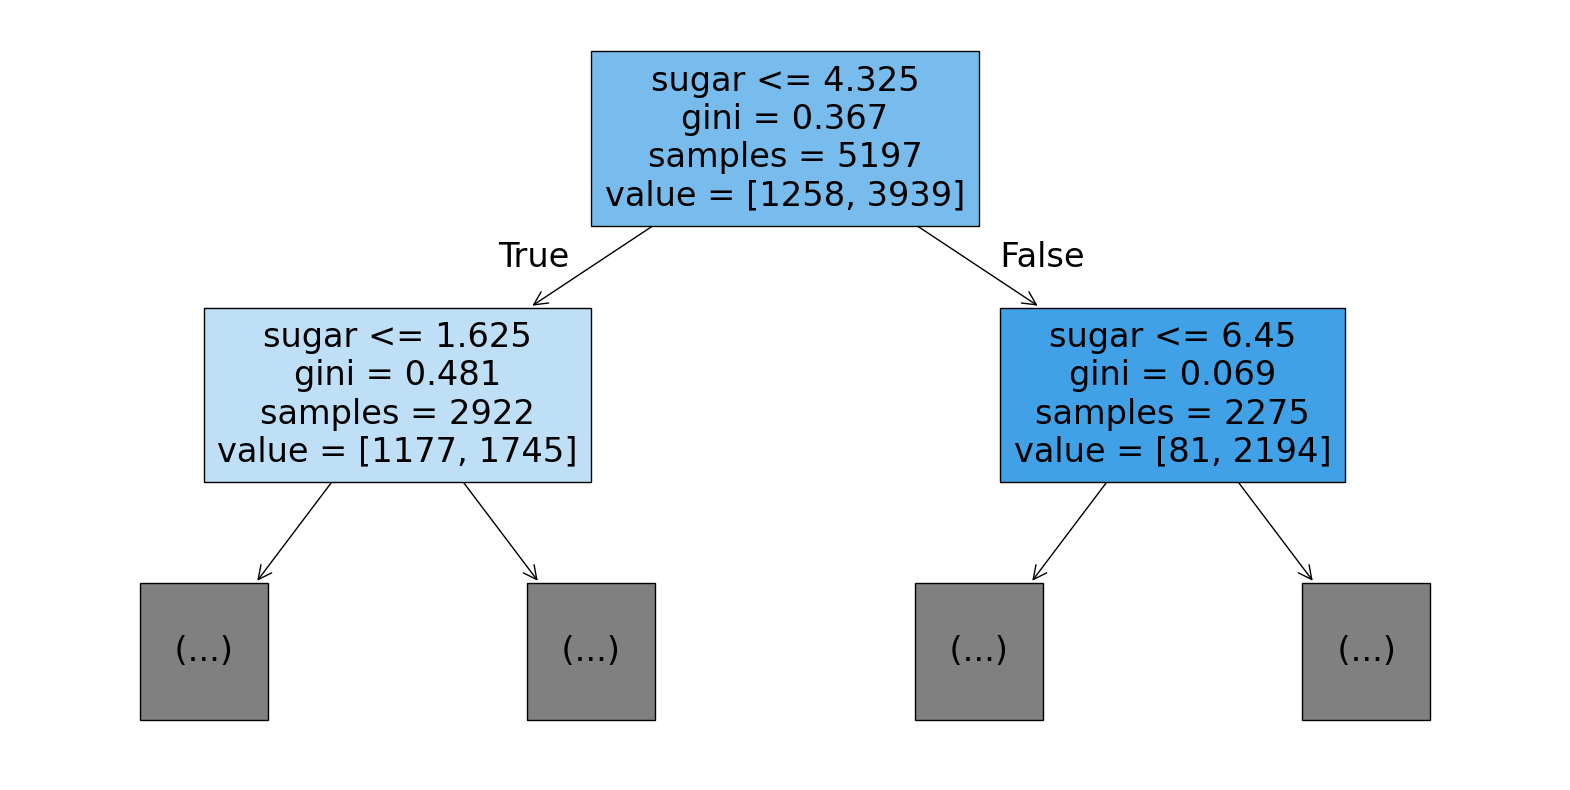

In [11]:
plt.figure(figsize=(20,10))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

In [12]:
# 가지치기

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(trian_input, train_target)

print(dt.score(trian_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


In [13]:
# GridSearchCV
import numpy as np
from sklearn.model_selection import GridSearchCV

params = {'max_depth': np.arange(2,12)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

gs.fit(trian_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': array([ 2, 3..., 9, 10, 11])}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
np.mean(gs.cv_results_['mean_test_score'])

np.float64(0.8506461649515066)

In [15]:
dt = gs.best_estimator_

print(dt.score(trian_input, train_target))
print(dt.score(test_input, test_target))

0.9003271117952665
0.8584615384615385


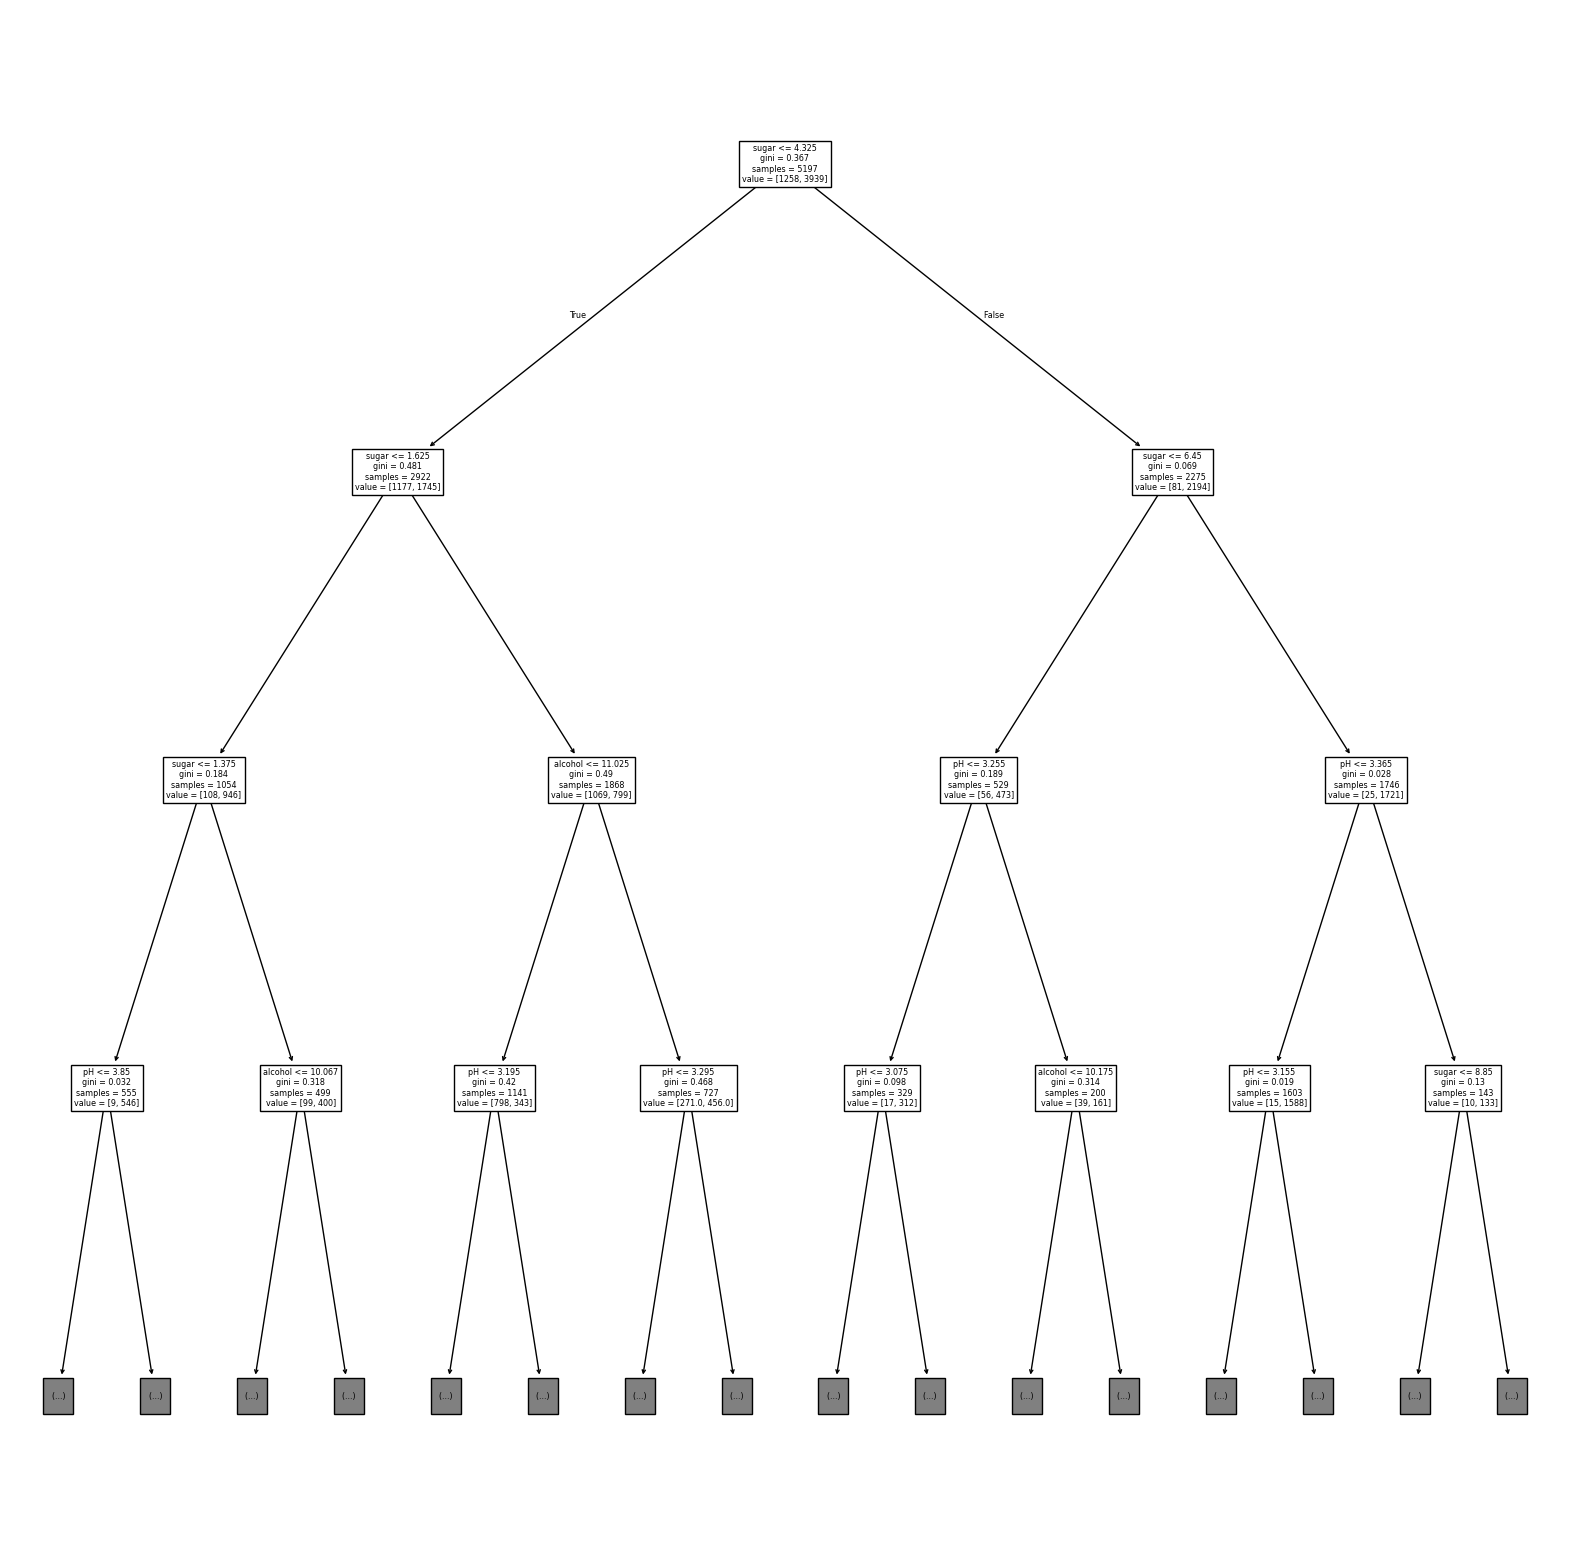

In [17]:
plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=3 ,feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [18]:
# 특성 중요도
dt.feature_importances_

array([0.17976778, 0.65284899, 0.16738324])